# Chainer CIFAR100 
## flop_sp_efficiency profile

Profiled on Mouse, CUDA 9.1 

```
31Jan0840peter@mouse:~$ ./profile_cifar.sh --metrics flop_sp_efficiency,flop_dp_efficiency --csv --log-file chainer_trace_mouse_flops.csv
```

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
import os.path
import datetime
from cycler import cycler
import pandas as pd

In [2]:
filename_nvprof_flops_chainer = "chainer_trace_mouse_flops.csv"

maxrows = None


In [3]:
file1 = filename_nvprof_flops_chainer
print "Reading",file1

# columns = [time_field_index, duration_field_index,size_field_index, throughput_field_index,
#            src_field_index, dst_field_index,
#            context_index, stream_index,
#            name_field_index]


Reading chainer_trace_mouse_flops.csv


In [5]:
print file1
df = pd.read_csv(file1, header = 0, skiprows=[0,1,2,3,4], nrows = maxrows)
print df.shape

chainer_trace_mouse_flops.csv
(102, 8)


In [6]:
df.iloc[:3]

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,Quadro P2000 (0),sgemm_32x32x32_TN_vec,98,flop_sp_efficiency,FLOP Efficiency(Peak Single),58.235327%,73.068185%,67.864665%
1,Quadro P2000 (0),sgemm_32x32x32_TN_vec,98,flop_dp_efficiency,FLOP Efficiency(Peak Double),0.000000%,0.000000%,0.000000%
2,Quadro P2000 (0),cupy_not_equal,118,flop_sp_efficiency,FLOP Efficiency(Peak Single),0.000000%,0.000000%,0.000000%


#### Parse data to float

In [7]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(s):
    global pat
    if type(s) is not str:
        return s
    f = pat.search(s)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [8]:
df[['Min','Max','Avg']] = df[['Min','Max','Avg']].applymap(parseFloat)

In [40]:
df.iloc[:3]

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,Quadro P2000 (0),sgemm_32x32x32_TN_vec,98,flop_sp_efficiency,FLOP Efficiency(Peak Single),58.235327,73.068185,67.864665
1,Quadro P2000 (0),sgemm_32x32x32_TN_vec,98,flop_dp_efficiency,FLOP Efficiency(Peak Double),0.000000,0.000000,0.000000
2,Quadro P2000 (0),cupy_not_equal,118,flop_sp_efficiency,FLOP Efficiency(Peak Single),0.000000,0.000000,0.000000


#### Review profiling data

In [41]:
df_sp_wide = df[df['Metric Name'] == "flop_sp_efficiency"]
df_sp_wide = df_sp_wide.drop(columns = ['Device', 'Metric Description']).fillna(0)
df_sp_wide

,Kernel,Invocations,Metric Name,Min,Max,Avg
0,sgemm_32x32x32_TN_vec,98,flop_sp_efficiency,58.235327,73.068185,67.864665
2,cupy_not_equal,118,flop_sp_efficiency,0.000000,0.000000,0.000000
4,void pooling_bw_kernel_max_nchw_fully_packed_s...,490,flop_sp_efficiency,0.003217,0.186076,0.076913
6,"void gen_sequenced<curandStateXORWOW, float, i...",980,flop_sp_efficiency,0.875959,1.814494,1.625368
8,cupy_sum,118,flop_sp_efficiency,0.000000,0.000000,0.000000
10,maxwell_scudnn_winograd_128x128_ldg1_ldg4_tile...,118,flop_sp_efficiency,26.728175,27.246747,27.189679
12,cupy_mean,118,flop_sp_efficiency,0.002655,0.009324,0.008429
14,maxwell_sgemm_128x64_nt,98,flop_sp_efficiency,76.993807,82.889467,80.378499
16,"generate_seed_pseudo(unsigned __int64, unsigne...",1,flop_sp_efficiency,0.000000,0.000000,0.000000
18,cupy_argmax,118,flop_sp_efficiency,0.000000,0.000000,0.000000


### Aggregate values for min, max and avg for all kernels

#### Remove unused columns

In [12]:
df_parts = df.drop(columns = ['Device', 'Kernel', 'Invocations', 'Metric Description']).fillna(0)
print df_parts.shape
df_parts.iloc[:3]

(102, 4)


,Metric Name,Min,Max,Avg
0,flop_sp_efficiency,58.235327,73.068185,67.864665
1,flop_dp_efficiency,0.000000,0.000000,0.000000
2,flop_sp_efficiency,0.000000,0.000000,0.000000


#### Remove >100 values

"--replay-mode application" option produces invalid values for some kernels

In [17]:
df_valid = df_parts[(df_parts['Max'] <= 100) & (df_parts['Avg'] <= 100) & (df_parts['Min'] <= 100)]
print df_valid.shape
df_valid.iloc[:3]

(102, 4)


,Metric Name,Min,Max,Avg
0,flop_sp_efficiency,58.235327,73.068185,67.864665
1,flop_dp_efficiency,0.000000,0.000000,0.000000
2,flop_sp_efficiency,0.000000,0.000000,0.000000


### Split Dataframe into two: for SP and DP 

In [27]:
flops_dp = df_valid[df_valid['Metric Name'] == "flop_dp_efficiency"]
print flops_dp.shape
flops_dp.iloc[:3]

(51, 4)


,Metric Name,Min,Max,Avg
1,flop_dp_efficiency,0.0,0.0,0.0
3,flop_dp_efficiency,0.0,0.0,0.0
5,flop_dp_efficiency,0.0,0.0,0.0


In [29]:
flops_sp = df_valid[df_valid['Metric Name'] == "flop_sp_efficiency"]
print flops_sp.shape
flops_sp.iloc[:3]

(51, 4)


,Metric Name,Min,Max,Avg
0,flop_sp_efficiency,58.235327,73.068185,67.864665
2,flop_sp_efficiency,0.000000,0.000000,0.000000
4,flop_sp_efficiency,0.003217,0.186076,0.076913


#### Remove all-zero rows

In [32]:
def RemoveZeroData(df):
    df = df[(df['Min'] != 0) | (df['Avg'] != 0) | (df['Max'] != 0)]
    return df

In [35]:
flops_dp = RemoveZeroData(flops_dp)
print flops_dp.shape
flops_dp.iloc[:5]

(4, 4)


,Metric Name,Min,Max,Avg
23,flop_dp_efficiency,2.293563,2.499142,2.419070
65,flop_dp_efficiency,15.944580,75.498375,68.394273
75,flop_dp_efficiency,0.000000,7.784353,0.186549
89,flop_dp_efficiency,0.000000,7.287968,0.068622


In [36]:
flops_sp = RemoveZeroData(flops_sp)
print flops_sp.shape
flops_sp.iloc[:3]

(38, 4)


,Metric Name,Min,Max,Avg
0,flop_sp_efficiency,58.235327,73.068185,67.864665
4,flop_sp_efficiency,0.003217,0.186076,0.076913
6,flop_sp_efficiency,0.875959,1.814494,1.625368


### Plot distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cb41510>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x10d771c90>]], dtype=object)

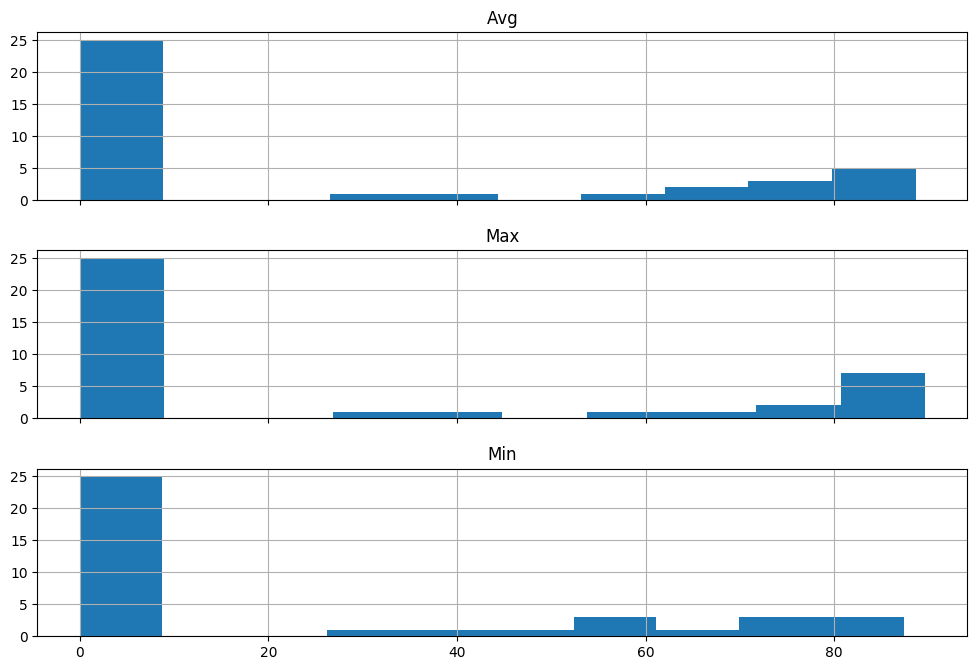

In [38]:
plt.rcParams['figure.figsize'] = 12,8
flops_sp.hist(layout=(3,1),sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d8943d0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x10dbc27d0>]], dtype=object)

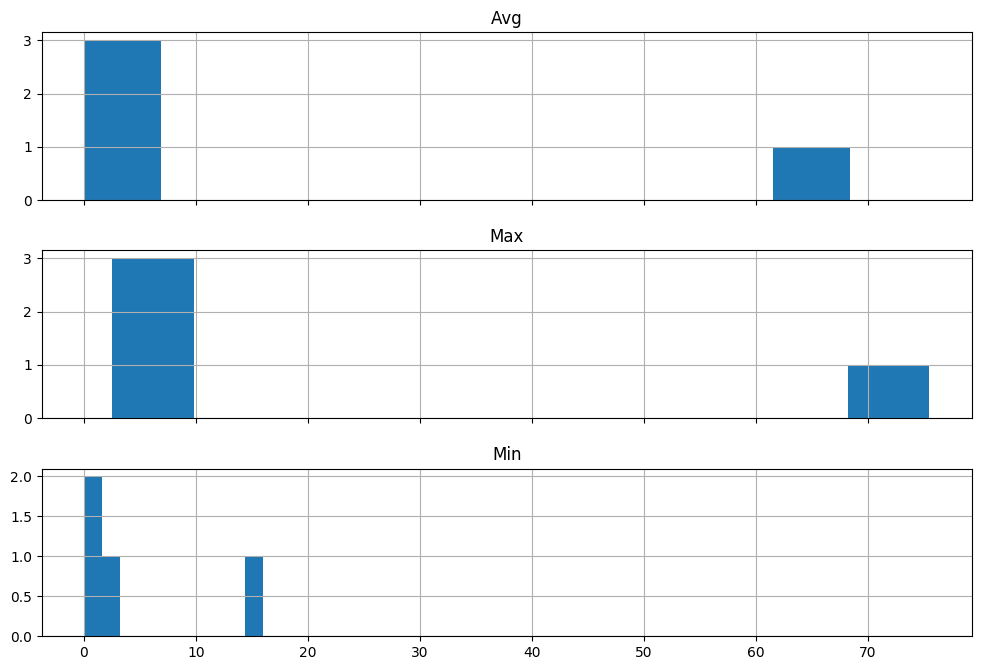

In [39]:
flops_dp.hist(layout=(3,1),sharex=True)

### Aggregate values for Min, Max and Avg

In [43]:
sp_diverse = pd.pivot_table(flops_sp, values=['Min','Max','Avg'], index='Metric Name',
                        aggfunc={'Min':np.min, 'Max':np.max, 'Avg':np.mean})
sp_diverse

,Avg,Max,Min
Metric Name,,,
flop_sp_efficiency,24.781398,89.629281,0.0


In [44]:
dp_diverse = pd.pivot_table(flops_dp, values=['Min','Max','Avg'], index='Metric Name',
                        aggfunc={'Min':np.min, 'Max':np.max, 'Avg':np.mean})
dp_diverse

,Avg,Max,Min
Metric Name,,,
flop_dp_efficiency,17.767129,75.498375,0.0


In [45]:
sp_mean = pd.pivot_table(flops_sp, values=['Min','Max','Avg'], index='Metric Name',
                        aggfunc={'Min':np.mean, 'Max':np.mean, 'Avg':np.mean})
sp_mean

,Avg,Max,Min
Metric Name,,,
flop_sp_efficiency,24.781398,25.840499,22.52768


In [46]:
dp_mean = pd.pivot_table(flops_dp, values=['Min','Max','Avg'], index='Metric Name',
                        aggfunc={'Min':np.mean, 'Max':np.mean, 'Avg':np.mean})
dp_mean

,Avg,Max,Min
Metric Name,,,
flop_dp_efficiency,17.767129,23.26746,4.559536


#    FLOP efficiency for Cifar100 sample

|   | Max | Avg |  
|---|---|---|
| SP | 89% | 24.8% |
| DP | 75.5% | 17.8% |
